In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import ftfy
from PIL import features
import numpy as np


In [24]:
# Load datasets

steam_games_df = pd.read_csv('data/generated/steam_games.csv',dtype={'id': str})
items_df = pd.read_csv('data/generated/items.csv', dtype={'item_id': str})
reviews_df = pd.read_csv('data/generated/reviews_sentiment.csv', dtype={'item_id': str})


In [25]:
columnas_object = steam_games_df.select_dtypes(include=['object']).columns
steam_games_df[columnas_object] = steam_games_df[columnas_object].astype(str)

columnas_object = items_df.select_dtypes(include=['object']).columns
items_df[columnas_object] = items_df[columnas_object].astype(str)

columnas_object = reviews_df.select_dtypes(include=['object']).columns
reviews_df[columnas_object] = reviews_df[columnas_object].astype(str)

## EDA STEAM_GAMES_DF

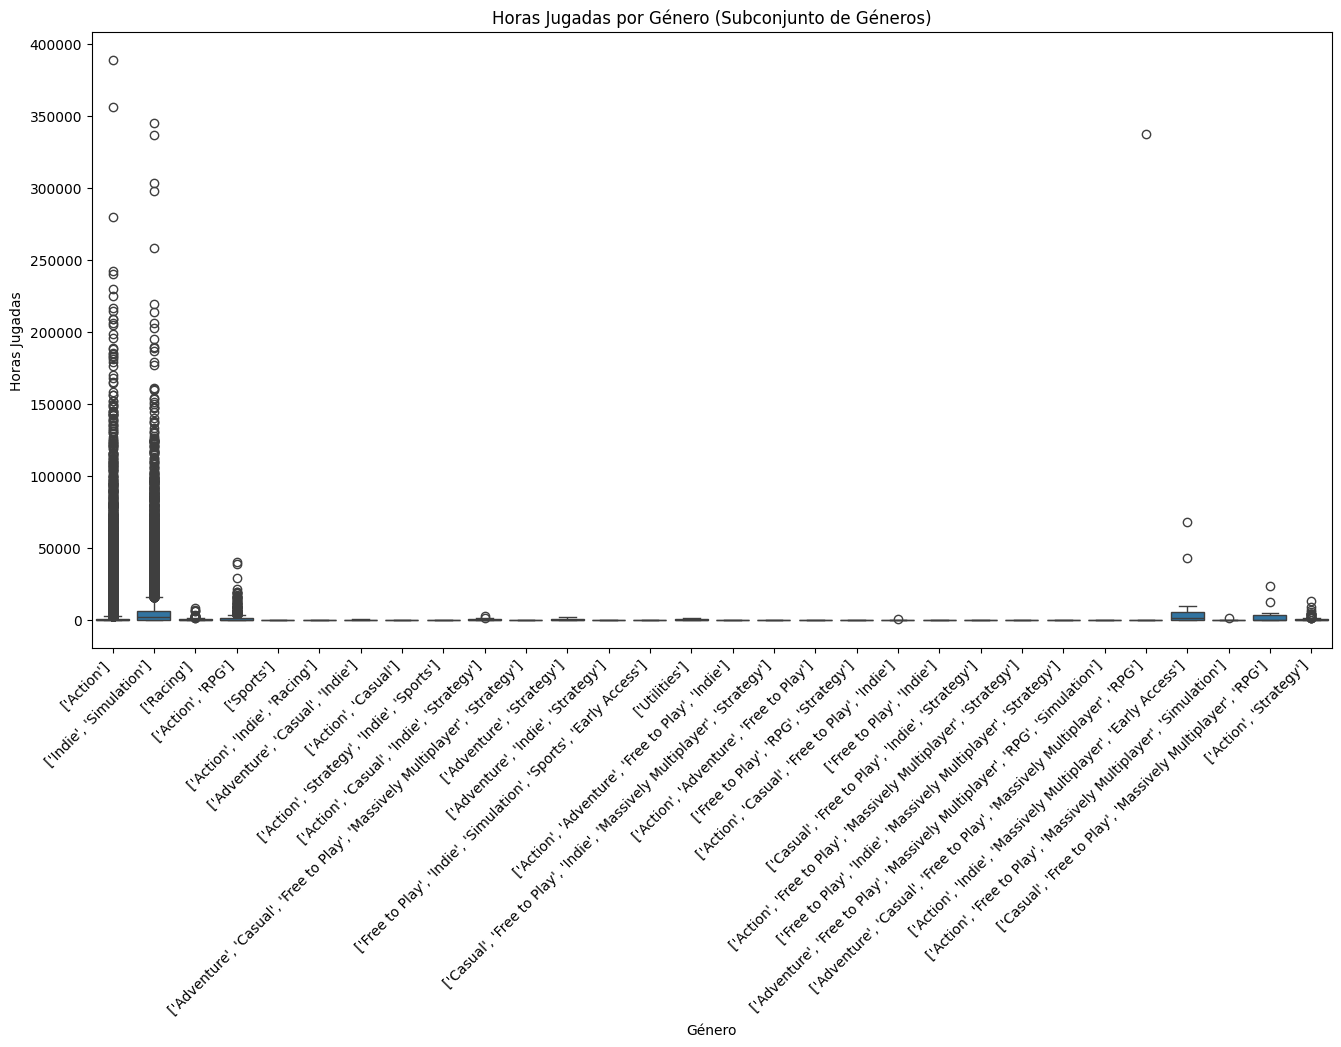

In [39]:
# Unir 'steam_games_df' con 'items_df' usando 'item_id' como clave de unión
import random


merged_df = pd.merge(steam_games_df[['id', 'genres']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Seleccionar aleatoriamente 10 géneros para mostrar en el boxplot
selected_genres = random.sample(list(merged_df['genres'].unique()), 30)

# Filtrar el DataFrame para incluir solo los géneros seleccionados
subset_df = merged_df[merged_df['genres'].isin(selected_genres)]

plt.figure(figsize=(16, 8))
sns.boxplot(x='genres', y='playtime_forever', data=subset_df)
plt.title('Horas Jugadas por Género (Subconjunto de Géneros)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Género')
plt.ylabel('Horas Jugadas')
plt.show()

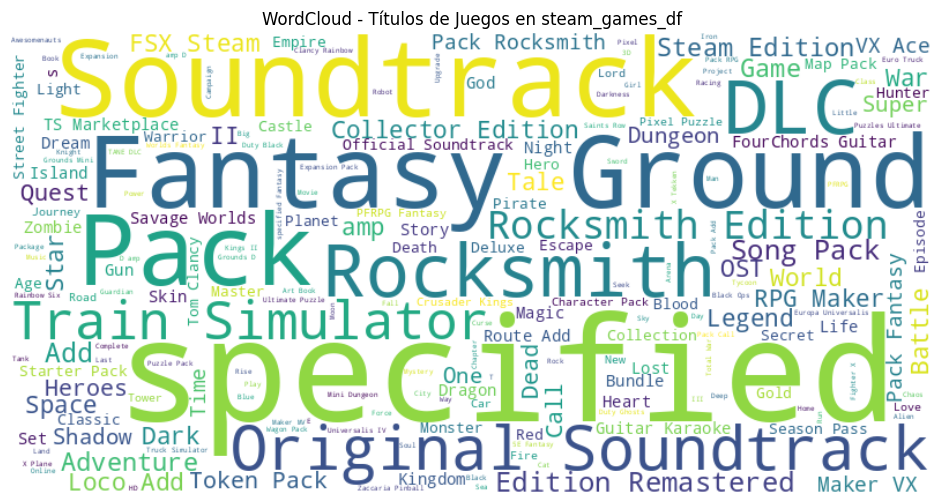

In [27]:
# Ruta a una fuente TrueType en tu sistema

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(steam_games_df['title']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Títulos de Juegos en steam_games_df')
plt.show()

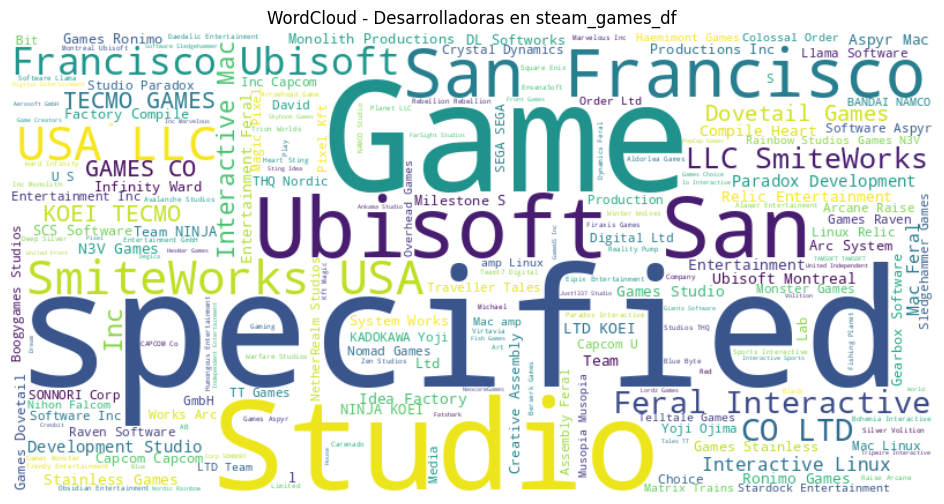

In [30]:
wordcloud_developers = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(steam_games_df['developer']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_developers, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Desarrolladoras en steam_games_df')
plt.show()

plt.show()

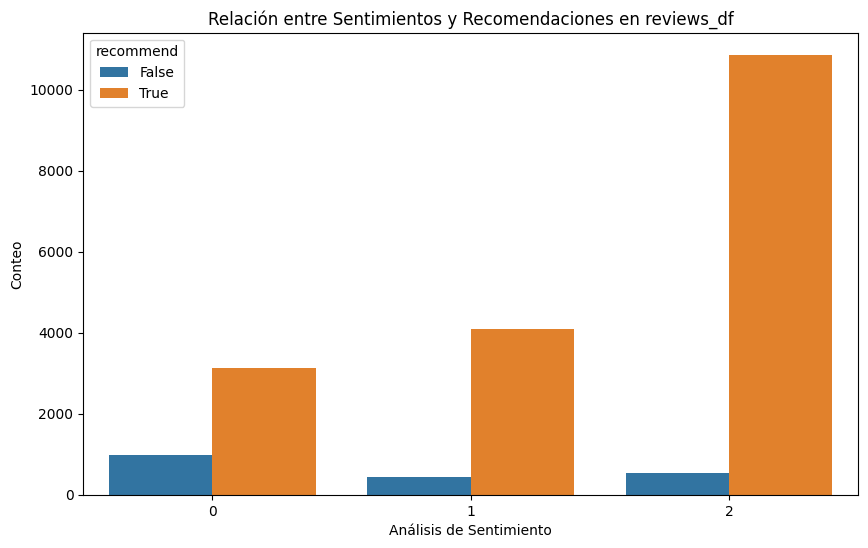

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_analysis', hue='recommend', data=reviews_df)
plt.title('Relación entre Sentimientos y Recomendaciones en reviews_df')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Conteo')
plt.show()

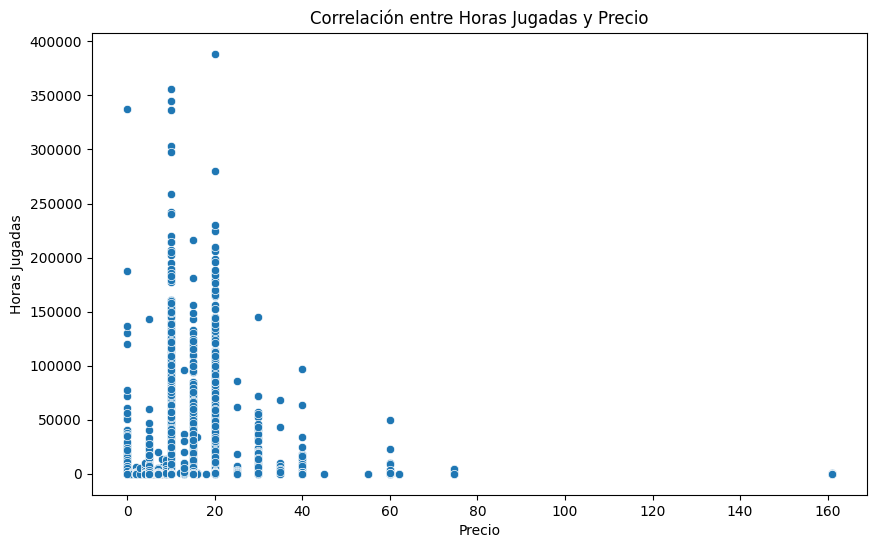

In [42]:
# Unir 'steam_games_df' con 'items_df' usando 'item_id' como clave de unión
merged_df = pd.merge(steam_games_df[['id', 'price']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='playtime_forever', data=merged_df)
plt.title('Correlación entre Horas Jugadas y Precio')
plt.xlabel('Precio')
plt.ylabel('Horas Jugadas')
plt.show()

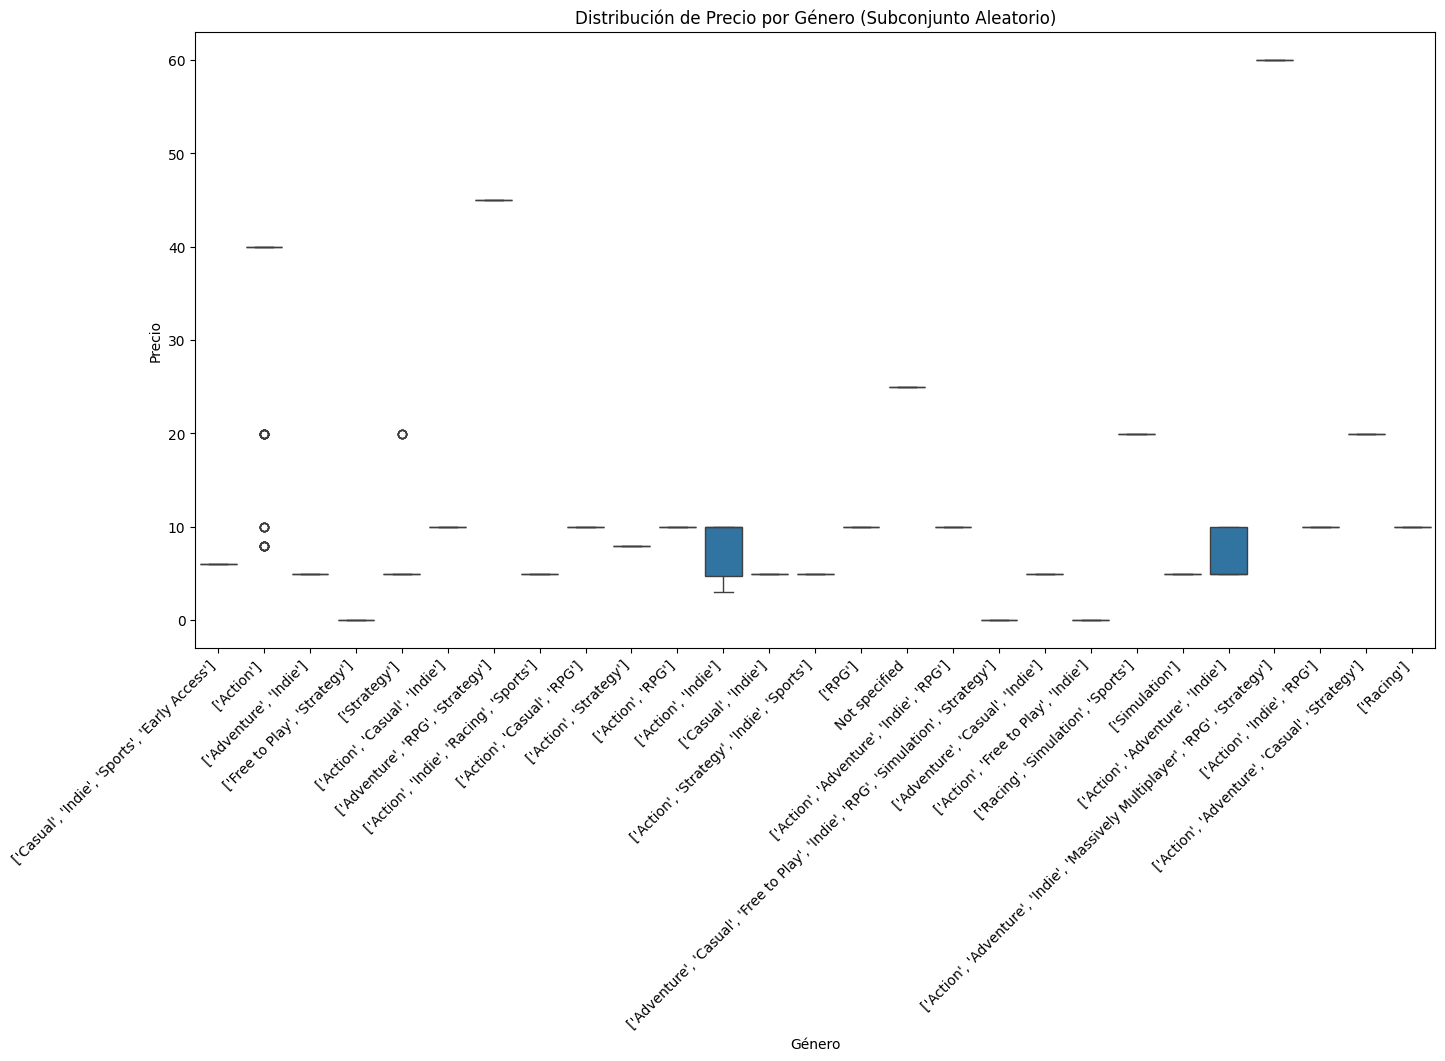

In [48]:

# Tomar un subconjunto aleatorio de 1000 filas para la visualización
subset_genre_df = steam_games_df.sample(n=1000, random_state=42)

# Unir 'steam_games_df' con 'items_df' usando 'item_id' como clave de unión
merged_df = pd.merge(subset_genre_df[['id', 'genres', 'price']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(16, 8))
sns.boxplot(x='genres', y='price', data=merged_df)
plt.title('Distribución de Precio por Género (Subconjunto Aleatorio)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Género')
plt.ylabel('Precio')
plt.show()

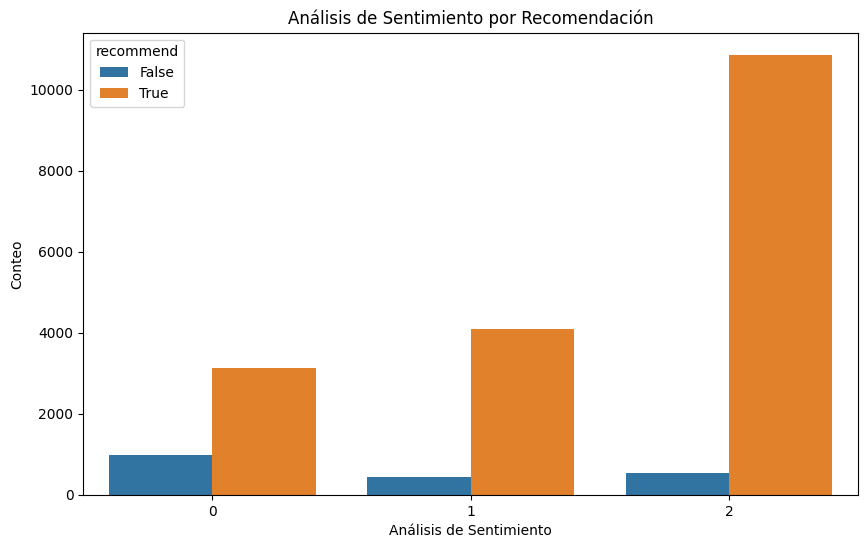

In [45]:

# No es necesario unir, ya que la información está en 'reviews_df'
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_analysis', hue='recommend', data=reviews_df)
plt.title('Análisis de Sentimiento por Recomendación')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Conteo')
plt.show()

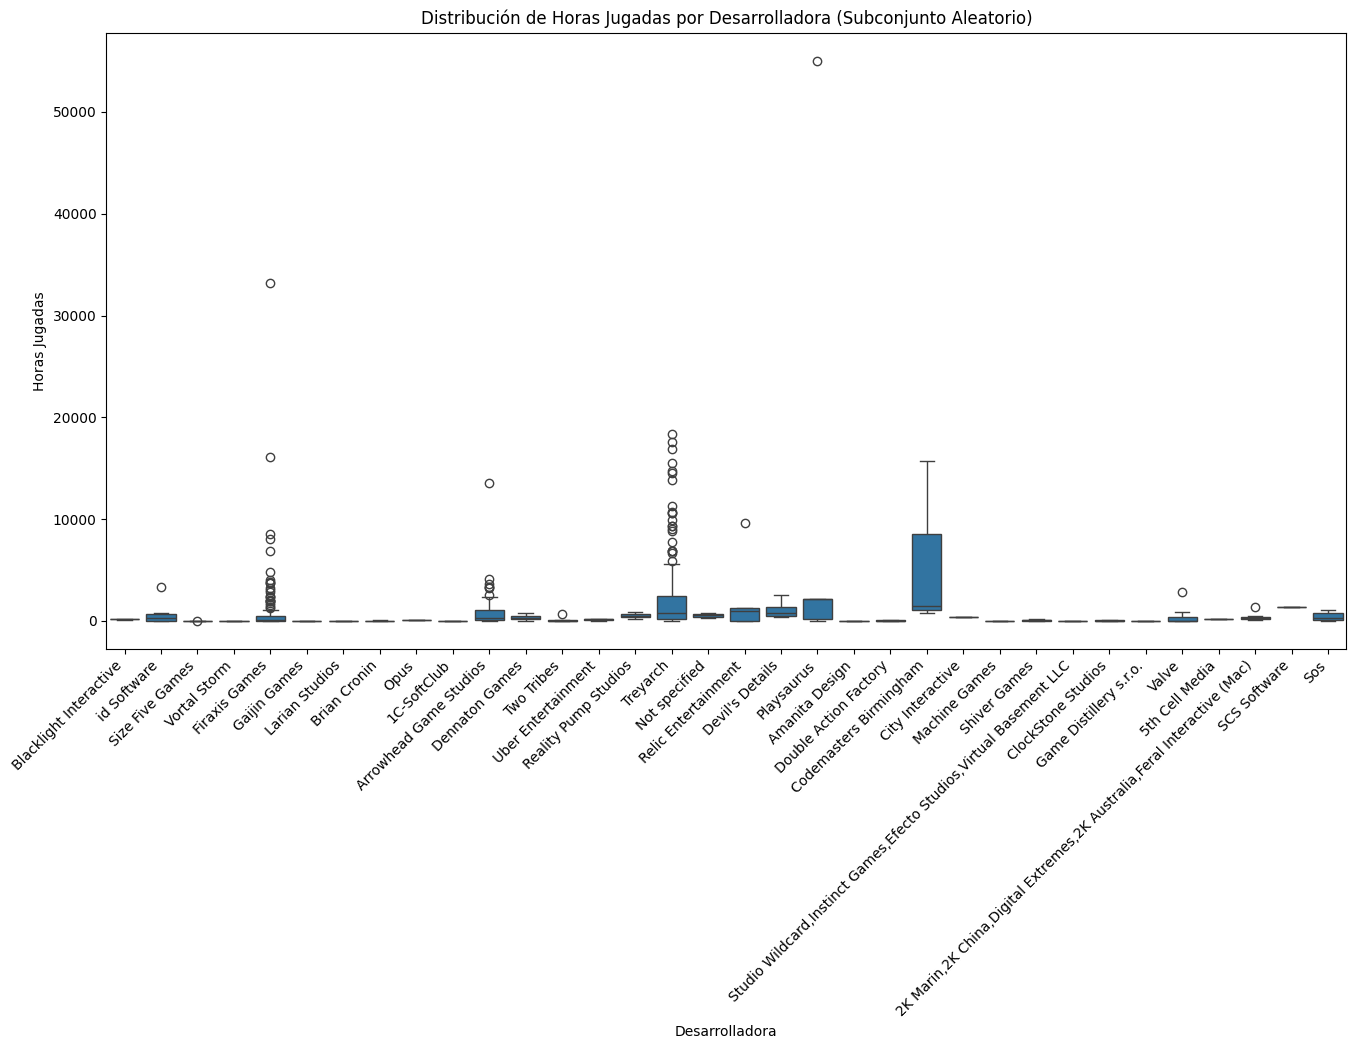

In [47]:
# Tomar un subconjunto aleatorio de 1000 filas para la visualización
subset_developer_df = steam_games_df.sample(n=1000, random_state=42)

# Unir 'steam_games_df' con 'items_df' usando 'item_id' como clave de unión
merged_df = pd.merge(subset_developer_df[['id', 'developer']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

plt.figure(figsize=(16, 8))
sns.boxplot(x='developer', y='playtime_forever', data=merged_df)
plt.title('Distribución de Horas Jugadas por Desarrolladora (Subconjunto Aleatorio)')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Desarrolladora')
plt.ylabel('Horas Jugadas')
plt.show()

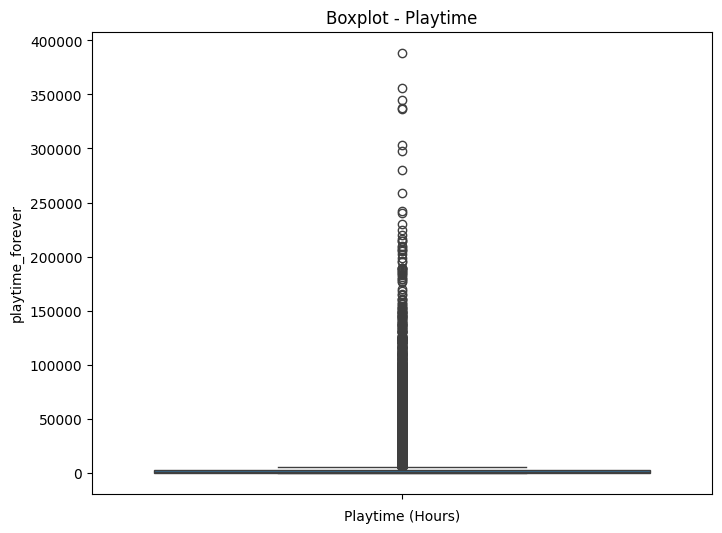

In [50]:
# Merge 'steam_games_df' with 'items_df' using 'id' as the merging key
merged_df = pd.merge(steam_games_df[['id']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Visualize boxplot to identify outliers in 'playtime_forever'
plt.figure(figsize=(8, 6))
sns.boxplot(merged_df['playtime_forever'])
plt.title('Boxplot - Playtime')
plt.xlabel('Playtime (Hours)')
plt.show()

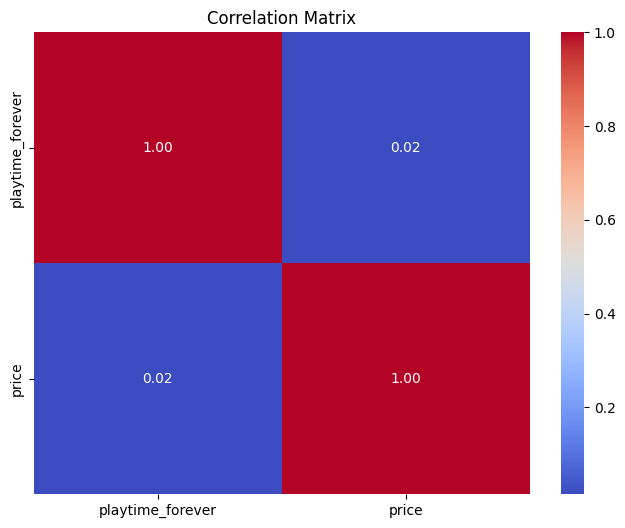

In [51]:
merged_df = pd.merge(steam_games_df[['id', 'price']], items_df[['item_id', 'playtime_forever']], left_on='id', right_on='item_id', how='inner')

# Calculate correlation matrix between 'playtime_forever' and 'price'
correlation_matrix = merged_df[['playtime_forever', 'price']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()